In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline


In [2]:
df = pd.read_csv('CarInsurance-1-1.csv')

In [3]:
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [4]:
df_1 = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [5]:
df_1.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [6]:
df_1.shape

(5822, 86)

In [7]:
df_1[np.any(df_1[df_1.columns[2:]].isnull(), axis=1)]

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase


In [8]:
df_1.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
MOSTYPE,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718
MAANTHUI,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166
MGEMOMV,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,0.017428,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384
MGEMLEEF,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,-0.025187,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540
MOSHOOFD,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,-0.027240,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723
MGODRK,-0.193613,-0.006136,0.013105,-0.037519,-0.199186,1.000000,-0.372767,0.021125,-0.063904,-0.028594,...,0.003793,-0.008450,0.005386,-0.012843,0.001928,-0.000675,0.011795,-0.001503,-0.011431,-0.004009
MGODPR,0.090399,-0.024360,0.049356,0.093654,0.098493,-0.372767,1.000000,-0.317549,-0.741895,0.147256,...,-0.018459,-0.014355,0.003949,0.003975,0.046352,0.013760,0.018468,0.001906,0.002392,0.016658
MGODOV,-0.025642,0.012056,-0.108650,0.057737,-0.034566,0.021125,-0.317549,1.000000,-0.139306,-0.125703,...,0.003050,0.006572,-0.005569,0.017696,0.006302,-0.023877,0.009417,0.025661,-0.009734,0.010127
MGODGE,-0.019505,0.020540,-0.005527,-0.119966,-0.021466,-0.063904,-0.741895,-0.139306,1.000000,-0.107900,...,0.010169,0.008844,0.004242,-0.004139,-0.052605,-0.008412,-0.026407,-0.011122,0.007261,-0.027291
MRELGE,-0.065596,0.023025,0.534798,-0.040384,-0.026619,-0.028594,0.147256,-0.125703,-0.107900,1.000000,...,0.015056,0.011512,0.022376,0.011678,-0.007979,0.009711,-0.001566,0.020921,-0.003420,0.036569


In [9]:
df_1.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [10]:
df_1.shape

(5822, 86)

In [11]:
response = df_1['Purchase']
predictors = df_1.drop(['Purchase'], axis=1)

In [12]:
print ('Response Shape:',response.shape)
print ('Predictor Shape:',predictors.shape)

Response Shape: (5822,)
Predictor Shape: (5822, 85)


In [13]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(response, 10, test_size=0.3, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = predictors.values[train_index], predictors.values[test_index]
    y_train, y_test = response[train_index], response[test_index]

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
response.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

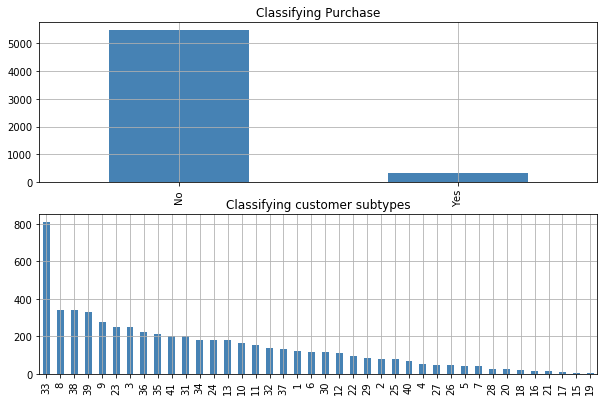

In [15]:
fig = plt.figure(figsize=(10,10))

# Tells the total count of different values in Purchase
plt.subplot(3,1,1)
response.value_counts().plot(kind='bar', title='Classifying Purchase', color='steelblue', grid=True)

# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
predictors['MOSTYPE'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color='steelblue', grid=True)


Text(0,0.5,'Purchase or not')

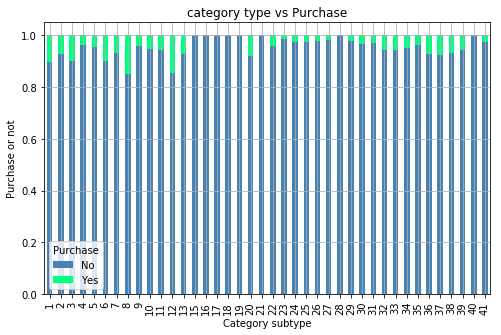

In [16]:
categorysubtype_purchase = pd.crosstab(predictors['MOSTYPE'], response)
categorysubtype_purchase_pct = categorysubtype_purchase.div(categorysubtype_purchase.sum(1).astype(float), axis=0)
categorysubtype_purchase_pct.plot(figsize= (8,5), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='category type vs Purchase', grid=True)
plt.xlabel('Category subtype')
plt.ylabel('Purchase or not')

Text(0,0.5,'count')

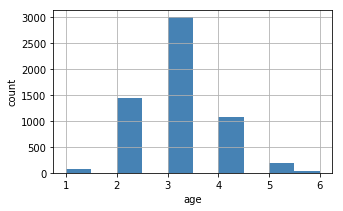

In [17]:
predictors['MGEMLEEF'].hist(figsize=(5,3), fc='steelblue', grid=True)
plt.xlabel('age')
plt.ylabel('count')

Text(0,0.5,'Purchase')

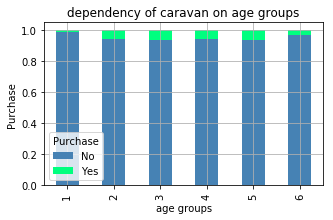

In [18]:
age_purchase = pd.crosstab(predictors['MGEMLEEF'], response)
age_purchase_pct = age_purchase.div(age_purchase.sum(1).astype(float),axis=0)
age_purchase_pct.plot(figsize=(5,3), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='dependency of caravan on age groups', grid=True)
plt.xlabel('age groups')
plt.ylabel('Purchase')

Text(0,0.5,'count')

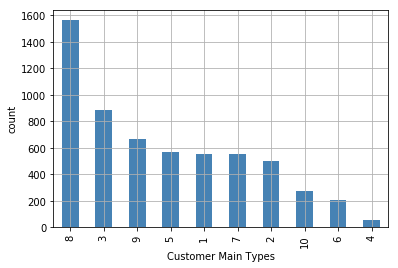

In [19]:
predictors['MOSHOOFD'].value_counts().plot(kind='bar', color='steelblue', grid=True)
plt.xlabel('Customer Main Types')
plt.ylabel('count')

Text(0,0.5,'Purchase')

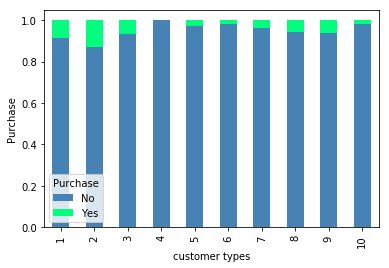

In [20]:
cust_type_purchase = pd.crosstab(predictors['MOSHOOFD'], response)
cust_type_purchase_pct = cust_type_purchase.div(cust_type_purchase.sum(1).astype(float), axis=0)
cust_type_purchase_pct.plot(kind='bar', stacked=True, color = ['steelblue', 'springgreen'])
plt.xlabel('customer types')
plt.ylabel('Purchase')

In [21]:
from sklearn.metrics import confusion_matrix


def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()